In [1]:
import numpy as np
import pandas as pd
import fredapi as fa
from fredapi import Fred
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
fred = Fred(api_key='5355d037e6ab7f6ea962893ca0d781f6')

In [4]:
df = {}
start_date='2010-01-01' 
end_date='2020-12-31'


In [5]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
# Personal Consumption Expenditures: Chain-type Price Index (PCEPI)
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed (DFII10)

df['DGS1MO'] = fred.get_series('DGS1MO', observation_start=start_date, observation_end=end_date).ffill()
df['DGS3MO'] = fred.get_series('DGS3MO', observation_start=start_date, observation_end=end_date).ffill()
df['DGS1'] = fred.get_series('DGS1', observation_start=start_date, observation_end=end_date).ffill()
df['DGS2'] = fred.get_series('DGS2', observation_start=start_date, observation_end=end_date).ffill()
df['DGS5'] = fred.get_series('DGS5', observation_start=start_date, observation_end=end_date).ffill()
df['DGS7'] = fred.get_series('DGS7', observation_start=start_date, observation_end=end_date).ffill()
df['DGS10'] = fred.get_series('DGS10', observation_start=start_date, observation_end=end_date).ffill()
df['DGS30'] = fred.get_series('DGS30', observation_start=start_date, observation_end=end_date).ffill()
df['TREAST'] = fred.get_series('TREAST', observation_start=start_date, observation_end=end_date).ffill()
df['FYGFDPUN'] = fred.get_series('FYGFDPUN', observation_start=start_date, observation_end=end_date).ffill()
df['FDHBFIN'] = fred.get_series('FDHBFIN', observation_start=start_date, observation_end=end_date).ffill()
df['GFDEBTN'] = fred.get_series('GFDEBTN', observation_start=start_date, observation_end=end_date).ffill()
df['BAA10Y'] = fred.get_series('BAA10Y', observation_start=start_date, observation_end=end_date).ffill()
# df['NASDAQ100'] = fred.get_series('NASDAQ100', observation_start=start_date, observation_end=end_date).ffill()
# df['FEDFUNDS'] = fred.get_series('FEDFUNDS', observation_start=start_date, observation_end=end_date).ffill()
df['DTWEXM'] = fred.get_series('DTWEXM', observation_start=start_date, observation_end=end_date).ffill()
# df['SP500'] = fred.get_series('SP500', observation_start=start_date, observation_end=end_date).ffill()
df['FEDDT'] = fred.get_series('FEDDT', observation_start=start_date, observation_end=end_date).ffill()
# df['FDHBPIN'] = fred.get_series('FDHBPIN', observation_start=start_date, observation_end=end_date).ffill()
# df['FDHBFRBN'] = fred.get_series('FDHBFRBN', observation_start=start_date, observation_end=end_date).ffill()
# df['CURRCIR'] = fred.get_series('CURRCIR', observation_start=start_date, observation_end=end_date).ffill()
df['CPIAUCSL'] = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date).ffill()
df['PCEPI'] = fred.get_series('PCEPI', observation_start=start_date, observation_end=end_date).ffill()

df['DGS6MO'] = fred.get_series('DGS6MO', observation_start=start_date, observation_end=end_date).ffill()
df['DGS3'] = fred.get_series('DGS3', observation_start=start_date, observation_end=end_date).ffill()
df['DGS20'] = fred.get_series('DGS20', observation_start=start_date, observation_end=end_date).ffill()
df['DFII10'] = fred.get_series('DFII10', observation_start=start_date, observation_end=end_date).ffill()
df['DFII5'] = fred.get_series('DFII5', observation_start=start_date, observation_end=end_date).ffill()
df['DFII30'] = fred.get_series('DFII30', observation_start=start_date, observation_end=end_date).ffill()







In [6]:
df = pd.DataFrame(df)

In [7]:
df=df.ffill()
print(df.shape)
print(df.head())


(2908, 23)
            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30    TREAST  \
2010-01-01     NaN     NaN   NaN   NaN   NaN   NaN    NaN    NaN       NaN   
2010-01-04    0.05    0.08  0.45  1.09  2.65  3.36   3.85   4.65       NaN   
2010-01-05    0.03    0.07  0.41  1.01  2.56  3.28   3.77   4.59       NaN   
2010-01-06    0.03    0.06  0.40  1.01  2.60  3.33   3.85   4.70  776595.0   
2010-01-07    0.02    0.05  0.40  1.03  2.62  3.33   3.85   4.69  776595.0   

             FYGFDPUN  ...   DTWEXM     FEDDT  CPIAUCSL   PCEPI  DGS6MO  DGS3  \
2010-01-01  8294251.0  ...      NaN       NaN   217.488  95.348     NaN   NaN   
2010-01-04  8294251.0  ...  73.6127       NaN   217.488  95.348    0.18  1.66   
2010-01-05  8294251.0  ...  73.5325       NaN   217.488  95.348    0.17  1.57   
2010-01-06  8294251.0  ...  73.5662  159879.0   217.488  95.348    0.15  1.60   
2010-01-07  8294251.0  ...  73.9495  159879.0   217.488  95.348    0.16  1.62   

            DGS20  DFII10  DFII5 

In [8]:
tsy_data = df.dropna()
print(tsy_data.shape)
#print(tsy_data.head())
print(tsy_data.tail())

(2872, 23)
            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30     TREAST  \
2020-12-25    0.09    0.09  0.10  0.13  0.37  0.66   0.94   1.66  4682881.0   
2020-12-28    0.09    0.11  0.11  0.13  0.38  0.65   0.94   1.67  4682881.0   
2020-12-29    0.08    0.10  0.11  0.12  0.37  0.66   0.94   1.67  4682881.0   
2020-12-30    0.06    0.08  0.12  0.12  0.37  0.66   0.93   1.66  4688916.0   
2020-12-31    0.08    0.09  0.10  0.13  0.36  0.65   0.93   1.65  4688916.0   

              FYGFDPUN  ...   DTWEXM   FEDDT  CPIAUCSL   PCEPI  DGS6MO  DGS3  \
2020-12-25  21651416.0  ...  90.8221  2347.0   261.564  112.15    0.09  0.17   
2020-12-28  21651416.0  ...  90.8221  2347.0   261.564  112.15    0.11  0.17   
2020-12-29  21651416.0  ...  90.8221  2347.0   261.564  112.15    0.12  0.17   
2020-12-30  21651416.0  ...  90.8221  2347.0   261.564  112.15    0.09  0.17   
2020-12-31  21651416.0  ...  90.8221  2347.0   261.564  112.15    0.09  0.17   

            DGS20  DFII10  DFII5 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [10]:
tsy_data['FDHBFIN'] = tsy_data['FDHBFIN'] * 1000
tsy_data['GOV_PCT'] = tsy_data['TREAST'] / tsy_data['GFDEBTN']
tsy_data['HOM_PCT'] = tsy_data['FYGFDPUN'] / tsy_data['GFDEBTN']
tsy_data['FOR_PCT'] = tsy_data['FDHBFIN'] / tsy_data['GFDEBTN']

In [11]:
print(tsy_data.head(10))

            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30    TREAST  \
2010-02-22    0.06    0.11  0.37  0.91  2.47  3.25   3.80   4.73  776571.0   
2010-02-23    0.08    0.12  0.36  0.87  2.37  3.13   3.69   4.63  776571.0   
2010-02-24    0.08    0.12  0.34  0.87  2.40  3.14   3.70   4.63  776549.0   
2010-02-25    0.09    0.13  0.32  0.82  2.33  3.09   3.64   4.58  776549.0   
2010-02-26    0.09    0.13  0.32  0.81  2.30  3.05   3.61   4.55  776549.0   
2010-03-01    0.09    0.13  0.32  0.80  2.28  3.04   3.61   4.56  776549.0   
2010-03-02    0.09    0.14  0.32  0.80  2.27  3.04   3.62   4.57  776549.0   
2010-03-03    0.09    0.14  0.33  0.82  2.27  3.04   3.63   4.58  776553.0   
2010-03-04    0.09    0.14  0.35  0.86  2.28  3.03   3.61   4.56  776553.0   
2010-03-05    0.11    0.15  0.38  0.91  2.35  3.10   3.69   4.64  776553.0   

             FYGFDPUN  ...   PCEPI  DGS6MO  DGS3  DGS20  DFII10  DFII5  \
2010-02-22  8294251.0  ...  95.345    0.19  1.48   4.60    1.55   0

In [12]:
print(df.columns)

Index(['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30',
       'TREAST', 'FYGFDPUN', 'FDHBFIN', 'GFDEBTN', 'BAA10Y', 'DTWEXM', 'FEDDT',
       'CPIAUCSL', 'PCEPI', 'DGS6MO', 'DGS3', 'DGS20', 'DFII10', 'DFII5',
       'DFII30'],
      dtype='object')


In [13]:
tsy_data.index
tsy_data.index.name='Date'

In [14]:
tsy_data.head()

,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,TREAST,FYGFDPUN,...,PCEPI,DGS6MO,DGS3,DGS20,DFII10,DFII5,DFII30,GOV_PCT,HOM_PCT,FOR_PCT
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-22,0.06,0.11,0.37,0.91,2.47,3.25,3.80,4.73,776571.0,8294251.0,...,95.345,0.19,1.48,4.60,1.55,0.55,2.22,0.060797,0.649352,0.303598
2010-02-23,0.08,0.12,0.36,0.87,2.37,3.13,3.69,4.63,776571.0,8294251.0,...,95.345,0.20,1.42,4.49,1.50,0.47,2.14,0.060797,0.649352,0.303598
2010-02-24,0.08,0.12,0.34,0.87,2.40,3.14,3.70,4.63,776549.0,8294251.0,...,95.345,0.19,1.42,4.49,1.51,0.50,2.16,0.060796,0.649352,0.303598
2010-02-25,0.09,0.13,0.32,0.82,2.33,3.09,3.64,4.58,776549.0,8294251.0,...,95.345,0.19,1.38,4.44,1.51,0.50,2.16,0.060796,0.649352,0.303598
2010-02-26,0.09,0.13,0.32,0.81,2.30,3.05,3.61,4.55,776549.0,8294251.0,...,95.345,0.19,1.36,4.40,1.48,0.47,2.13,0.060796,0.649352,0.303598


In [15]:
scaler = StandardScaler()

tsy_data[['DTWEXM', 'CPIAUCSL', 'FEDDT', 'PCEPI']] = scaler.fit_transform(tsy_data[['DTWEXM', 'CPIAUCSL', 'FEDDT', 'PCEPI']])


In [16]:
tsy_data

,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,TREAST,FYGFDPUN,...,PCEPI,DGS6MO,DGS3,DGS20,DFII10,DFII5,DFII30,GOV_PCT,HOM_PCT,FOR_PCT
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-22,0.06,0.11,0.37,0.91,2.47,3.25,3.80,4.73,776571.0,8294251.0,...,-1.851827,0.19,1.48,4.60,1.55,0.55,2.22,0.060797,0.649352,0.303598
2010-02-23,0.08,0.12,0.36,0.87,2.37,3.13,3.69,4.63,776571.0,8294251.0,...,-1.851827,0.20,1.42,4.49,1.50,0.47,2.14,0.060797,0.649352,0.303598
2010-02-24,0.08,0.12,0.34,0.87,2.40,3.14,3.70,4.63,776549.0,8294251.0,...,-1.851827,0.19,1.42,4.49,1.51,0.50,2.16,0.060796,0.649352,0.303598
2010-02-25,0.09,0.13,0.32,0.82,2.33,3.09,3.64,4.58,776549.0,8294251.0,...,-1.851827,0.19,1.38,4.44,1.51,0.50,2.16,0.060796,0.649352,0.303598
2010-02-26,0.09,0.13,0.32,0.81,2.30,3.05,3.61,4.55,776549.0,8294251.0,...,-1.851827,0.19,1.36,4.40,1.48,0.47,2.13,0.060796,0.649352,0.303598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,0.09,0.09,0.10,0.13,0.37,0.66,0.94,1.66,4682881.0,21651416.0,...,1.815110,0.09,0.17,1.46,-1.03,-1.55,-0.35,0.168766,0.780293,0.254820
2020-12-28,0.09,0.11,0.11,0.13,0.38,0.65,0.94,1.67,4682881.0,21651416.0,...,1.815110,0.11,0.17,1.46,-1.03,-1.54,-0.35,0.168766,0.780293,0.254820
2020-12-29,0.08,0.10,0.11,0.12,0.37,0.66,0.94,1.67,4682881.0,21651416.0,...,1.815110,0.12,0.17,1.47,-1.02,-1.53,-0.34,0.168766,0.780293,0.254820


In [17]:
return_period = 1
Y = tsy_data.loc[:, ['DGS1MO', 'DGS5', 'DGS30']].shift(-return_period)
Y.columns = [col+'_pred' for col in Y.columns]

# X = tsy_data.loc[:, ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30', 'GOV_PCT', 'HOM_PCT', 'FOR_PCT', 'BAA10Y', 'FEDFUNDS', 'DTWEXM', 'FEDDT', 'FDHBPIN', 'FDHBFRBN', 'CURRCIR']]
X = tsy_data.loc[:, ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30', 'GOV_PCT', 'HOM_PCT', 'FOR_PCT', 'BAA10Y', 'DGS6MO', 'DGS3', 'DGS20', 'DFII10', 'DFII5',
       'DFII30']]

df = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = df.loc[:, Y.columns]
X = df.loc[:, X.columns]

In [18]:
print(df.columns)

Index(['DGS1MO_pred', 'DGS5_pred', 'DGS30_pred', 'DGS1MO', 'DGS3MO', 'DGS1',
       'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30', 'GOV_PCT', 'HOM_PCT',
       'FOR_PCT', 'BAA10Y', 'DGS6MO', 'DGS3', 'DGS20', 'DFII10', 'DFII5',
       'DFII30'],
      dtype='object')


In [19]:
df.head(10)

,DGS1MO_pred,DGS5_pred,DGS30_pred,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,...,GOV_PCT,HOM_PCT,FOR_PCT,BAA10Y,DGS6MO,DGS3,DGS20,DFII10,DFII5,DFII30
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-22,0.08,2.37,4.63,0.06,0.11,0.37,0.91,2.47,3.25,3.80,...,0.060797,0.649352,0.303598,2.65,0.19,1.48,4.60,1.55,0.55,2.22
2010-02-23,0.08,2.40,4.63,0.08,0.12,0.36,0.87,2.37,3.13,3.69,...,0.060797,0.649352,0.303598,2.65,0.20,1.42,4.49,1.50,0.47,2.14
2010-02-24,0.09,2.33,4.58,0.08,0.12,0.34,0.87,2.40,3.14,3.70,...,0.060796,0.649352,0.303598,2.65,0.19,1.42,4.49,1.51,0.50,2.16
2010-02-25,0.09,2.30,4.55,0.09,0.13,0.32,0.82,2.33,3.09,3.64,...,0.060796,0.649352,0.303598,2.64,0.19,1.38,4.44,1.51,0.50,2.16
2010-02-26,0.09,2.28,4.56,0.09,0.13,0.32,0.81,2.30,3.05,3.61,...,0.060796,0.649352,0.303598,2.62,0.19,1.36,4.40,1.48,0.47,2.13
2010-03-01,0.09,2.27,4.57,0.09,0.13,0.32,0.80,2.28,3.04,3.61,...,0.060796,0.649352,0.303598,2.65,0.19,1.34,4.41,1.46,0.45,2.14
2010-03-02,0.09,2.27,4.58,0.09,0.14,0.32,0.80,2.27,3.04,3.62,...,0.060796,0.649352,0.303598,2.64,0.19,1.33,4.42,1.46,0.44,2.14
2010-03-03,0.09,2.28,4.56,0.09,0.14,0.33,0.82,2.27,3.04,3.63,...,0.060796,0.649352,0.303598,2.63,0.19,1.34,4.43,1.46,0.43,2.15
2010-03-04,0.11,2.35,4.64,0.09,0.14,0.35,0.86,2.28,3.03,3.61,...,0.060796,0.649352,0.303598,2.62,0.19,1.38,4.40,1.44,0.44,2.12


In [20]:
# scale=StandardScaler()

In [21]:
# scale.fit(df.loc[:, ['DTWEXM', 'SP500', 'FEDDT', 'FDHBPIN', 'FDHBFRBN', 'CURRCIR']])

# df.loc[:, ['DTWEXM']]=scale.fit(df.loc[:, ['DTWEXM']])
# df.loc[:, ['SP500']]=scale.fit(df.loc[:, ['SP500']])
# df.loc[:, ['FEDDT']]=scale.fit(df.loc[:, ['FEDDT']])
# df.loc[:, ['FDHBPIN']]=scale.fit(df.loc[:, ['FDHBPIN']])
# df.loc[:, ['FDHBFRBN']]=scale.fit(df.loc[:, ['FDHBFRBN']])
# df.loc[:, ['CURRCIR']]=scale.fit(df.loc[:, ['CURRCIR']])

In [22]:
# print(scale.transform(df.loc[:, ['DTWEXM', 'SP500', 'FEDDT', 'FDHBPIN', 'FDHBFRBN', 'CURRCIR']]))

# scale.transform(df.loc[:, ['DTWEXM']])
# scale.transform(df.loc[:, ['SP500']])
# scale.transform(df.loc[:, ['FEDDT']])
# scale.transform(df.loc[:, ['FDHBPIN']])
# scale.transform(df.loc[:, ['FDHBFRBN']])
# scale.transform(df.loc[:, ['CURRCIR']])

In [23]:
df.head(10)

,DGS1MO_pred,DGS5_pred,DGS30_pred,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,...,GOV_PCT,HOM_PCT,FOR_PCT,BAA10Y,DGS6MO,DGS3,DGS20,DFII10,DFII5,DFII30
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-22,0.08,2.37,4.63,0.06,0.11,0.37,0.91,2.47,3.25,3.80,...,0.060797,0.649352,0.303598,2.65,0.19,1.48,4.60,1.55,0.55,2.22
2010-02-23,0.08,2.40,4.63,0.08,0.12,0.36,0.87,2.37,3.13,3.69,...,0.060797,0.649352,0.303598,2.65,0.20,1.42,4.49,1.50,0.47,2.14
2010-02-24,0.09,2.33,4.58,0.08,0.12,0.34,0.87,2.40,3.14,3.70,...,0.060796,0.649352,0.303598,2.65,0.19,1.42,4.49,1.51,0.50,2.16
2010-02-25,0.09,2.30,4.55,0.09,0.13,0.32,0.82,2.33,3.09,3.64,...,0.060796,0.649352,0.303598,2.64,0.19,1.38,4.44,1.51,0.50,2.16
2010-02-26,0.09,2.28,4.56,0.09,0.13,0.32,0.81,2.30,3.05,3.61,...,0.060796,0.649352,0.303598,2.62,0.19,1.36,4.40,1.48,0.47,2.13
2010-03-01,0.09,2.27,4.57,0.09,0.13,0.32,0.80,2.28,3.04,3.61,...,0.060796,0.649352,0.303598,2.65,0.19,1.34,4.41,1.46,0.45,2.14
2010-03-02,0.09,2.27,4.58,0.09,0.14,0.32,0.80,2.27,3.04,3.62,...,0.060796,0.649352,0.303598,2.64,0.19,1.33,4.42,1.46,0.44,2.14
2010-03-03,0.09,2.28,4.56,0.09,0.14,0.33,0.82,2.27,3.04,3.63,...,0.060796,0.649352,0.303598,2.63,0.19,1.34,4.43,1.46,0.43,2.15
2010-03-04,0.11,2.35,4.64,0.09,0.14,0.35,0.86,2.28,3.03,3.61,...,0.060796,0.649352,0.303598,2.62,0.19,1.38,4.40,1.44,0.44,2.12


In [24]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
for col in Y.columns:
    temp_Y = df[col]
    temp_X = df.loc[:, X.columns]
    fit = bestfeatures.fit(temp_X,temp_Y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(col)
    print(featureScores.nlargest(10,'Score'))  #print 10 best features
    print('--------------')

DGS1MO_pred
      Specs         Score
0    DGS1MO  2.691328e+06
1    DGS3MO  5.714799e+05
12   DGS6MO  1.549908e+05
2      DGS1  5.519607e+04
3      DGS2  1.757004e+04
13     DGS3  7.439195e+03
11   BAA10Y  1.958206e+03
4      DGS5  1.772361e+03
16    DFII5  1.528274e+03
10  FOR_PCT  9.875543e+02
--------------
DGS5_pred
     Specs          Score
4     DGS5  625056.058730
5     DGS7   25753.265617
13    DGS3   14507.285548
16   DFII5    9761.992493
15  DFII10    7323.307089
3     DGS2    5738.747591
6    DGS10    5157.298659
2     DGS1    2829.422313
11  BAA10Y    2245.045377
12  DGS6MO    2216.388141
--------------
DGS30_pred
      Specs          Score
7     DGS30  647913.996974
14    DGS20  140979.145861
17   DFII30   17144.050399
6     DGS10   13388.291013
9   HOM_PCT    6239.363169
5      DGS7    3201.010672
15   DFII10    2691.127032
8   GOV_PCT    1594.331212
4      DGS5     902.610324
10  FOR_PCT     813.958105
--------------


In [25]:
validation_size = 0.2

seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [26]:
print(X_train)

            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30   GOV_PCT  \
Date                                                                         
2019-10-18    1.75    1.66  1.58  1.58  1.56  1.66   1.76   2.25  0.091507   
2014-03-20    0.06    0.06  0.14  0.45  1.73  2.31   2.79   3.67  0.131002   
2018-07-27    1.90    2.00  2.43  2.67  2.84  2.92   2.96   3.09  0.109681   
2014-09-10    0.01    0.02  0.11  0.58  1.79  2.22   2.54   3.26  0.136929   
2017-11-14    1.06    1.26  1.55  1.68  2.06  2.26   2.38   2.84  0.120042   
...            ...     ...   ...   ...   ...   ...    ...    ...       ...   
2016-03-16    0.28    0.31  0.66  0.87  1.41  1.72   1.94   2.73  0.127757   
2019-10-16    1.71    1.66  1.59  1.58  1.57  1.65   1.75   2.23  0.091507   
2012-03-06    0.06    0.08  0.17  0.30  0.83  1.35   1.96   3.08  0.106468   
2014-10-03    0.01    0.01  0.11  0.57  1.73  2.16   2.45   3.13  0.135146   
2010-10-21    0.13    0.13  0.22  0.37  1.15  1.85   2.57   3.95

In [27]:
# scale=StandardScaler()

In [28]:
# X_train.loc[:,'CURRCIR':]=scale.fit_transform(X_train.loc[:,'CURRCIR':])
# X_validation.loc[:,'CURRCIR':]=scale.fit_transform(X_validation.loc[:,'CURRCIR':])

In [29]:
print(X_train)

            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30   GOV_PCT  \
Date                                                                         
2019-10-18    1.75    1.66  1.58  1.58  1.56  1.66   1.76   2.25  0.091507   
2014-03-20    0.06    0.06  0.14  0.45  1.73  2.31   2.79   3.67  0.131002   
2018-07-27    1.90    2.00  2.43  2.67  2.84  2.92   2.96   3.09  0.109681   
2014-09-10    0.01    0.02  0.11  0.58  1.79  2.22   2.54   3.26  0.136929   
2017-11-14    1.06    1.26  1.55  1.68  2.06  2.26   2.38   2.84  0.120042   
...            ...     ...   ...   ...   ...   ...    ...    ...       ...   
2016-03-16    0.28    0.31  0.66  0.87  1.41  1.72   1.94   2.73  0.127757   
2019-10-16    1.71    1.66  1.59  1.58  1.57  1.65   1.75   2.23  0.091507   
2012-03-06    0.06    0.08  0.17  0.30  0.83  1.35   1.96   3.08  0.106468   
2014-10-03    0.01    0.01  0.11  0.57  1.73  2.16   2.45   3.13  0.135146   
2010-10-21    0.13    0.13  0.22  0.37  1.15  1.85   2.57   3.95

In [30]:
# X_train.loc[:,'DGS1MO':]=X_train.loc[:,'DGS1MO':].abs()
# X_validation.loc[:,'DGS1MO':]=X_validation.loc[:,'DGS1MO':].abs()

In [31]:
print(X_train)

            DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30   GOV_PCT  \
Date                                                                         
2019-10-18    1.75    1.66  1.58  1.58  1.56  1.66   1.76   2.25  0.091507   
2014-03-20    0.06    0.06  0.14  0.45  1.73  2.31   2.79   3.67  0.131002   
2018-07-27    1.90    2.00  2.43  2.67  2.84  2.92   2.96   3.09  0.109681   
2014-09-10    0.01    0.02  0.11  0.58  1.79  2.22   2.54   3.26  0.136929   
2017-11-14    1.06    1.26  1.55  1.68  2.06  2.26   2.38   2.84  0.120042   
...            ...     ...   ...   ...   ...   ...    ...    ...       ...   
2016-03-16    0.28    0.31  0.66  0.87  1.41  1.72   1.94   2.73  0.127757   
2019-10-16    1.71    1.66  1.59  1.58  1.57  1.65   1.75   2.23  0.091507   
2012-03-06    0.06    0.08  0.17  0.30  0.83  1.35   1.96   3.08  0.106468   
2014-10-03    0.01    0.01  0.11  0.57  1.73  2.16   2.45   3.13  0.135146   
2010-10-21    0.13    0.13  0.22  0.37  1.15  1.85   2.57   3.95

In [32]:
num_folds = 5
scoring = 'neg_mean_squared_error'

# try 5 folds

In [34]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
# Ensemble
models.append(('RF', RandomForestRegressor()))
# Neural Network
models.append(('MLP', MLPRegressor()))


In [35]:
pd.set_option('display.precision', 8)

In [36]:
kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

LR: 
Average CV error: 0.0016825482577953084 
Std CV Error: (0.00010659012936031517) 
Training Error:
DGS1MO_pred    0.00056343
DGS5_pred      0.00197179
DGS30_pred     0.00237953
dtype: float64 
Test Error:
DGS1MO_pred    0.00052888
DGS5_pred      0.00193745
DGS30_pred     0.00238589
dtype: float64
----------
LASSO: 
Average CV error: 0.5231189611990892 
Std CV Error: (0.018179062133997885) 
Training Error:
DGS1MO_pred    0.58743276
DGS5_pred      0.42992514
DGS30_pred     0.55141790
dtype: float64 
Test Error:
DGS1MO_pred    0.57243964
DGS5_pred      0.45026475
DGS30_pred     0.52324802
dtype: float64
----------
EN: 
Average CV error: 0.45261073438968535 
Std CV Error: (0.020348256941380625) 
Training Error:
DGS1MO_pred    0.44173109
DGS5_pred      0.42992514
DGS30_pred     0.48474839
dtype: float64 
Test Error:
DGS1MO_pred    0.43016617
DGS5_pred      0.45026475
DGS30_pred     0.46028065
dtype: float64
----------
KNN: 
Average CV error: 0.0019711072337469603 
Std CV Error: (0.000168

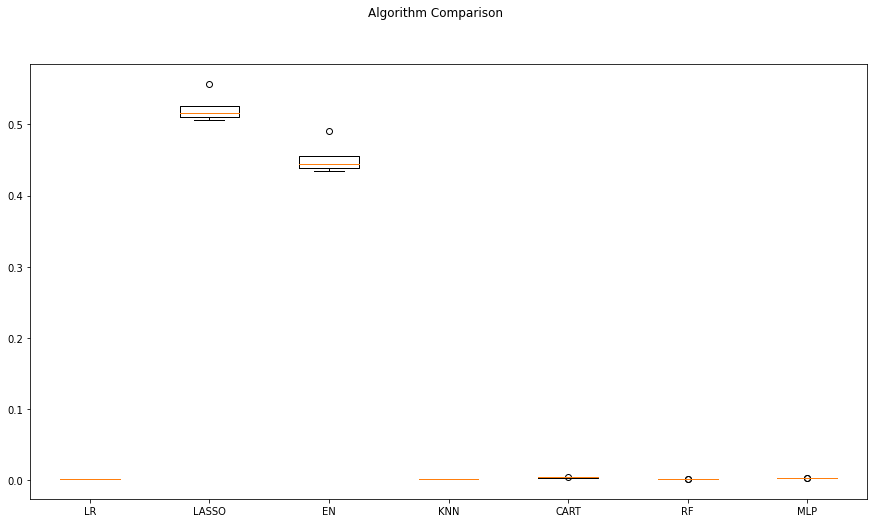

In [37]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

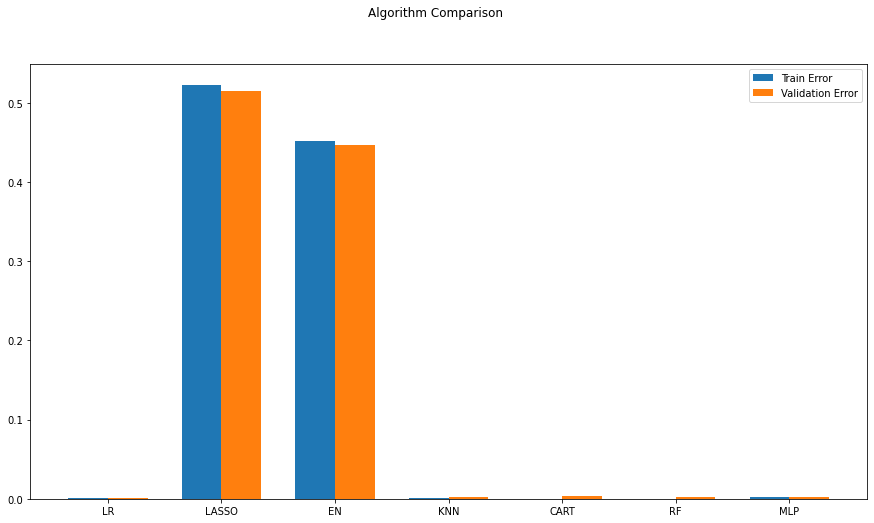

In [38]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
pyplot.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [39]:
# 7. Grid search : MLPRegressor 
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)], 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [100, 200, 300]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002660 using {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 200}
-0.126901 (0.115293) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.0001, 'max_iter': 100}
-0.033954 (0.006963) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.0001, 'max_iter': 200}
-0.034020 (0.011972) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.0001, 'max_iter': 300}
-0.006114 (0.001220) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001, 'max_iter': 100}
-0.006794 (0.003066) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001, 'max_iter': 200}
-0.005286 (0.001451) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001, 'max_iter': 300}
-0.003814 (0.000284) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 100}
-0.003639 (0.000803) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 200}
-0.003847 (0.000919) with: {'hidden_layer_sizes': (20,), 'learning_rate_init':

In [40]:
param_grid={'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001971 using {'n_neighbors': 5}
-0.002737 (0.000070) with: {'n_neighbors': 1}
-0.002163 (0.000112) with: {'n_neighbors': 2}
-0.002032 (0.000133) with: {'n_neighbors': 3}
-0.001984 (0.000162) with: {'n_neighbors': 4}
-0.001971 (0.000169) with: {'n_neighbors': 5}
-0.002046 (0.000202) with: {'n_neighbors': 6}
-0.002093 (0.000214) with: {'n_neighbors': 7}
-0.002149 (0.000215) with: {'n_neighbors': 8}
-0.002221 (0.000214) with: {'n_neighbors': 9}
-0.002283 (0.000194) with: {'n_neighbors': 10}
-0.002345 (0.000193) with: {'n_neighbors': 11}
-0.002441 (0.000201) with: {'n_neighbors': 12}
-0.002516 (0.000195) with: {'n_neighbors': 13}
-0.002568 (0.000202) with: {'n_neighbors': 14}
-0.002647 (0.000214) with: {'n_neighbors': 15}
-0.002716 (0.000238) with: {'n_neighbors': 16}
-0.002793 (0.000258) with: {'n_neighbors': 17}
-0.002851 (0.000257) with: {'n_neighbors': 18}
-0.002925 (0.000249) with: {'n_neighbors': 19}
-0.002996 (0.000239) with: {'n_neighbors': 20}


In [41]:
# RandomForest Regressor

param_grid={'n_estimators': [(50), (100), (200), (500), (600)], 'max_depth': [(4), (8), (12), (16), (20), (24), (28)]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001946 using {'max_depth': 24, 'n_estimators': 600}
-0.018994 (0.000620) with: {'max_depth': 4, 'n_estimators': 50}
-0.019386 (0.000795) with: {'max_depth': 4, 'n_estimators': 100}
-0.019166 (0.000834) with: {'max_depth': 4, 'n_estimators': 200}
-0.019146 (0.000782) with: {'max_depth': 4, 'n_estimators': 500}
-0.019158 (0.000738) with: {'max_depth': 4, 'n_estimators': 600}
-0.002376 (0.000134) with: {'max_depth': 8, 'n_estimators': 50}
-0.002341 (0.000152) with: {'max_depth': 8, 'n_estimators': 100}
-0.002337 (0.000139) with: {'max_depth': 8, 'n_estimators': 200}
-0.002326 (0.000140) with: {'max_depth': 8, 'n_estimators': 500}
-0.002330 (0.000138) with: {'max_depth': 8, 'n_estimators': 600}
-0.002005 (0.000102) with: {'max_depth': 12, 'n_estimators': 50}
-0.001973 (0.000114) with: {'max_depth': 12, 'n_estimators': 100}
-0.001973 (0.000120) with: {'max_depth': 12, 'n_estimators': 200}
-0.001956 (0.000126) with: {'max_depth': 12, 'n_estimators': 500}
-0.001957 (0.000125) with: {

In [42]:
# prepare model
model = MLPRegressor(hidden_layer_sizes= (50,), learning_rate_init= 0.01, max_iter= 300)
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300)

In [43]:
# prepare model
model = KNeighborsRegressor(n_neighbors= 5)
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [44]:
# prepare model
model = RandomForestRegressor(max_depth= 20, n_estimators= 600, random_state=17)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, n_estimators=600, random_state=17)

In [45]:
# estimate accuracy on validation set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model.predict(X_validation)
mse_MLP = mean_squared_error(Y_validation, predictions)
r2_MLP = r2_score(Y_validation, predictions)

# prepare model
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)
predictions_2 = model_2.predict(X_validation)

mse_OLS = mean_squared_error(Y_validation, predictions_2)
r2_OLS = r2_score(Y_validation, predictions_2)
print("MSE Regression = %f, MSE MLP = %f" % (mse_OLS, mse_MLP ))
print("R2 Regression = %f, R2 MLP = %f" % (r2_OLS, r2_MLP ))

MSE Regression = 0.001617, MSE MLP = 0.002045
R2 Regression = 0.996731, R2 MLP = 0.995881


In [46]:
train_size = int(len(X) * (1-validation_size))
X_train, X_validation = X[0:train_size], X[train_size:len(X)]
Y_train, Y_validation = Y[0:train_size], Y[train_size:len(X)]

modelMLP = MLPRegressor(hidden_layer_sizes=(20, 30, 20))
modelOLS = LinearRegression()
# modelKNN = KNeighborsRegressor(n_neighbors= 4)
# modelRF = RandomForestRegressor(max_depth= 20, n_estimators= 50, random_state=17)
model_MLP = modelMLP.fit(X_train, Y_train)
model_OLS = modelOLS.fit(X_train, Y_train)
# model_KNN = modelKNN.fit(X_train, Y_train)
# model_RF = modelRF.fit(X_train, Y_train)

Y_predMLP = pd.DataFrame(model_MLP.predict(X_validation), index=Y_validation.index,
                      columns=Y_validation.columns)

Y_predOLS = pd.DataFrame(model_OLS.predict(X_validation), index=Y_validation.index,
                      columns=Y_validation.columns)

# Y_predKNN = pd.DataFrame(model_KNN.predict(X_validation), index=Y_validation.index,
#                       columns=Y_validation.columns)

# Y_predRF = pd.DataFrame(model_RF.predict(X_validation), index=Y_validation.index,
#                       columns=Y_validation.columns)

<AxesSubplot:xlabel='Date'>

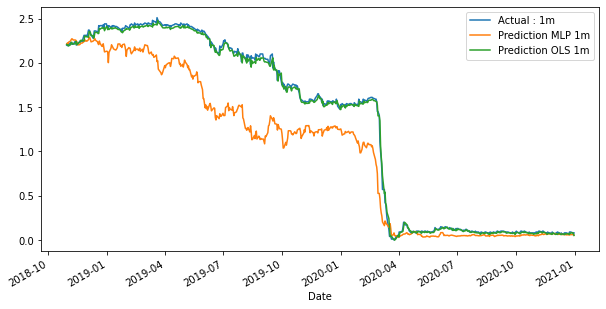

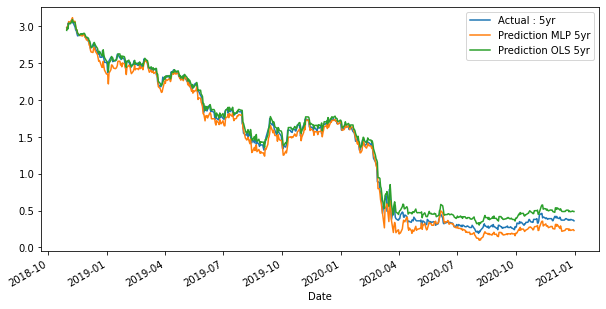

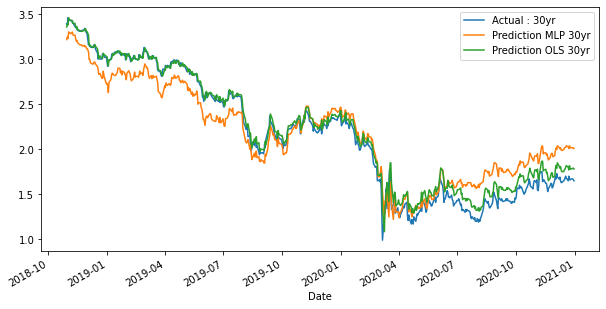

In [47]:
pd.DataFrame({'Actual : 1m': Y_validation.loc[:, 'DGS1MO_pred'],
              'Prediction MLP 1m': Y_predMLP.loc[:, 'DGS1MO_pred'],
              'Prediction OLS 1m': Y_predOLS.loc[:, 'DGS1MO_pred']}).plot(figsize=(10,5))

pd.DataFrame({'Actual : 5yr': Y_validation.loc[:, 'DGS5_pred'],
              'Prediction MLP 5yr': Y_predMLP.loc[:, 'DGS5_pred'],
              'Prediction OLS 5yr': Y_predOLS.loc[:, 'DGS5_pred']}).plot(figsize=(10,5))

pd.DataFrame({'Actual : 30yr': Y_validation.loc[:, 'DGS30_pred'],
              'Prediction MLP 30yr': Y_predMLP.loc[:, 'DGS30_pred'],
              'Prediction OLS 30yr': Y_predOLS.loc[:, 'DGS30_pred']}).plot(figsize=(10,5))